# Predicting the Cost of Annual Health Expenditure in the United States 

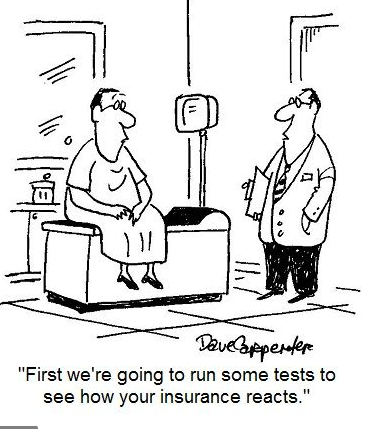

#### _Project and Final Report Created by: Kayla Brock: June 28, 2022_

In [3]:
from imports import *

### Project Description

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

This project aims to create a model that can accurately predict the annual medical expenditure of a customer based on a variety of factors. I chose this project because I am interested and deeply invested in this topic. At one point in my teaching career, because of exorbitant health insurance premiums, I had to leave my classroom job to pursue a teaching job online. It is my hope through this analysis I can make sense of why health insurance premiums are so costly. 

### Project Goal

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

The goal of this project is to create a machine learning model that accurately estimates the annual medical expenditure of health insurance customers. It is believed that, with better predictive capabilities, the insurance company will offer new plans that will both retain current customers as well as attract new customers.

### Initial Hypotheses 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>


    - older customers will have a significantly higher annual medical expenditure than younger customers
    - females (in childbearing years) will have a significantly higher annual medical expenditure than males 
    - customers with a bmi heavier than a 'healthy range' will have a higher annual medical expenditure than customers within a healthy bmi range 
    - per child annual medical expenditure will be significantly less than per adult annual medical expenditure
    - smoker annual medical expenditure will be significantly higher than non smoker annual medical expenditure
    - All things being equal, the annual medical expenditure should be equal from region to region 

### Initial Questions: 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

- Do older customers have higher annual medical expenditures than younger customers?
- Do females (in childbearing years) have a significantly higher annual medical expenditure than males? 
- Do customers with a bmi heavier than a 'healthy range'  have a higher annual medical expenditure than customers within a healthy bmi range? 
- Is the annual medical expenditure of smokers significantly higher than non smokers?
- All things being equal, Is the annual medical expenditure equal from region to region? 

# I. ACQUIRE 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [4]:
df = pd.read_csv('insurance.csv')

# II. PREPARE

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [5]:
train, validate, test = prepare.split_insurance_data(df)

In [6]:
train.head()

age     sex                  bmi  children smoker     region  \
1310   42    male                26.32         1     no  northwest   
1264   49  female                33.34         2     no  northeast   
1258   55    male                37.72         3     no  northwest   
1311   33  female                26.70         0     no  northwest   
1040   35  female                28.02         0    yes  northwest   

                  charges  
1310             6,940.91  
1264            10,370.91  
1258            30,063.58  
1311             4,571.41  
1040            20,234.85

# III. EXPLORE

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

#### Univariate 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [5]:
visuals.distribution_of_charges()

_The distribution of the target variable 'charges' is  right skewed. The range health expenditure with the greatest number of people is when charges equalled between 2,000 and 4,000 dollars. Interestingly, the inner quartile range starts at 4,465 dollars and ends at 16,638 dollars. There are multiple outliers, with the maximum being approximately 62,000 dollars._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [6]:
visuals.distribution_of_age()

_The age of customers is pretty evenly dispersed with the exception of customers under 20. The count of customers under 20 appears to be 2.5 times higher than all other age categories._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [7]:
visuals.distribution_of_bmi()

_BMI appears to follow a normal distribution. The inner quartile range is approximately between 26 and 35._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [8]:
visuals.distribution_of_children()

_Number of children is right skewed, with the majority of customers having 0 children_

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

*Distribution of Gender*

<AxesSubplot:xlabel='sex', ylabel='count'>

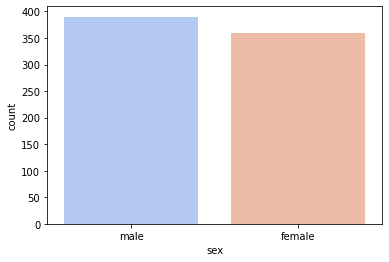

In [8]:
sns.countplot(x='sex', data=train, palette='coolwarm')

_There are slightly less female customers than male customers_ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

*Distribution by Smoker Status*

<AxesSubplot:xlabel='smoker', ylabel='count'>

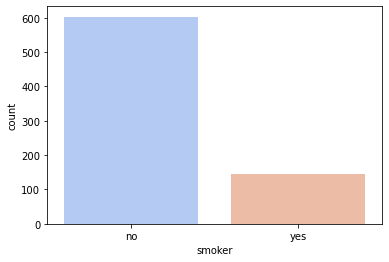

In [9]:
sns.countplot(x='smoker', data=train, palette='coolwarm')

_The majority of customers are 'non-smokers'_

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

*Distribution by Region*

<AxesSubplot:xlabel='region', ylabel='count'>

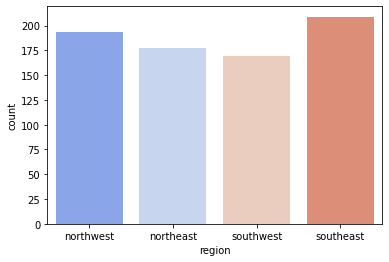

In [10]:
sns.countplot(x='region', data=train, palette='coolwarm')

_The distribution of regional data is somewhat uniform with the most data coming from the southeast region and the least amount of data coming from the southwest region._

#### Bivariate 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Q. 1 

###  _Do older customers have higher annual medical expenditures than younger customers?_

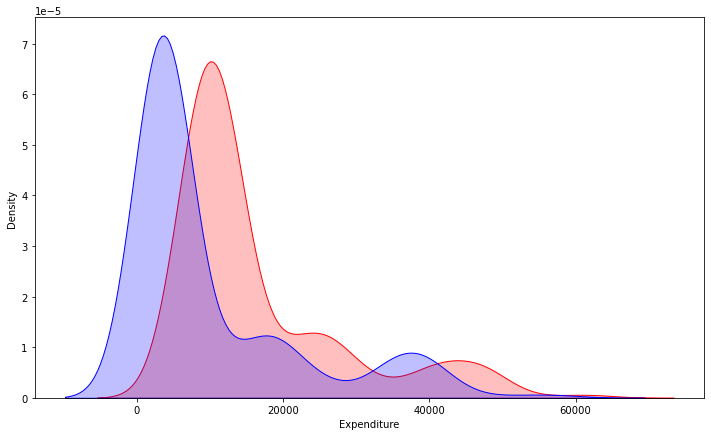

In [11]:
visuals.KDE_older_vs_younger()

_While customers under 40 and customers over 39 follow a similar shape the older group is shifted to the right suggesting a higher average of annual medical expenditure_

#### _Statistical Testing_ 

T-Test (2 Tailed) Statistical Testing will be conducted because we are using the medical expenditure of customers over 39 (subgroup) _compared to_ the medical expenditure of customers under 40 (subgroup)

- H0: Mean charges of older customers == Mean charges of younger customers
- HA: Mean charges of older customers != Mean charges of younger customers

In [12]:
#define variable 
train_older_customers = train[train['age'] > 39]
train_younger_customers = train[train['age'] < 40]
#create variables 
train_older_customers_charges = train_older_customers.charges
train_younger_customers_charges = train_younger_customers.charges


#Compare variance 
print(train_older_customers.charges.var())
print(train_younger_customers.charges.var())

137850774.2065682
143175581.1561


#### Variance not equal, set equal_var to false

In [13]:
#set alpha
alpha = 0.05 
#compute statistic and probability 
t, p = stats.ttest_ind(train_older_customers_charges, train_younger_customers_charges, equal_var = False )
#print results 
print(t, p, alpha)
#evaluate outcome
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print("We fail to reject the null hypothesis")

7.408894091253562 3.4539674598317905e-13 0.05
We reject the null hypothesis, our data is statistically relevant.


_The statistical test confirmed our previous observation: the data showed a significant enough variance to reject the null hypothesis._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Q. 2 

### _Do females (in childbearing years) have a significantly higher annual medical expenditure than males?_

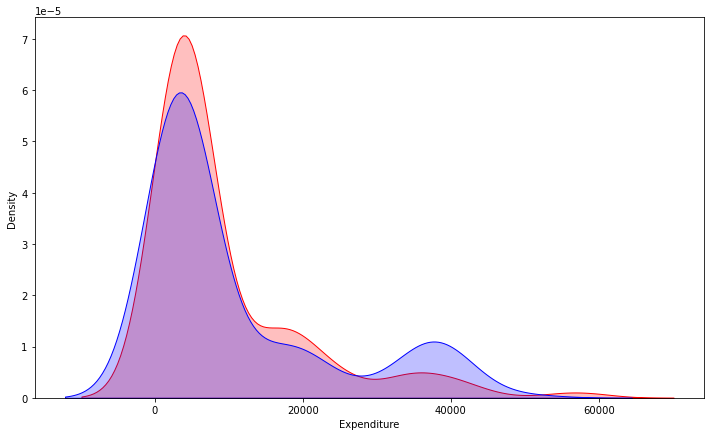

In [14]:
visuals.KDE_male_vs_female_under40()

_This visualization depicts more females than males falling into the 'smaller spending' range. (between 0 and 10,000 dollars) There are more females than males at the 20,000 dollar expenditure mark. There are more males than females at the 40,000 dollar expenditure mark. There are more females than males at the 60,000 dollar expenditure mark. While it is true that there are significant differences between males and females at certain points on the x axis (i.e.40,000 dollars), it seems most of the spending is pretty even._

#### _Statistical Testing_ 

T-Test (2 Tailed) Statistical Testing will be conducted because we are using the medical expenditure of female customers under 40 (subgroup) _compared to_  the medical expenditure of male customers under 40 

- H0: Mean charges of female customers under 40 == Mean charges of male customers under 40
- HA: Mean charges of female customers under 40 != Mean charges of male customers under 40

In [15]:
#define variables for visualization
train_older_customers = train[train['age'] > 39]
train_younger_customers = train[train['age'] < 40]
female_customers = train_younger_customers[train_younger_customers['sex'] == 'female']
male_customers = train_younger_customers[train_younger_customers['sex'] == 'male']

#create variables 
female_customers_charges = female_customers.charges
male_customers_charges = male_customers.charges


#Compare variance 
print(female_customers_charges.var())
print(male_customers_charges.var())

118518926.10609764
164694029.04097039


#### Variance not equal, set equal_var to false

In [16]:
#set alpha
alpha = 0.05 
#compute statistic and probability 
t, p = stats.ttest_ind(female_customers_charges, male_customers_charges, equal_var = False )
#print results 
print(t, p, alpha)
#evaluate outcome
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print("We fail to reject the null hypothesis")

-1.1595936955645705 0.24693964303528787 0.05
We fail to reject the null hypothesis


_The statistical test confirmed our previous observation: the data did not show a significant enough variance to reject the null hypothesis._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Q. 3 

### _Do customers with a bmi considered 'obese'  have a higher annual medical expenditure than 'non obese' customers?_


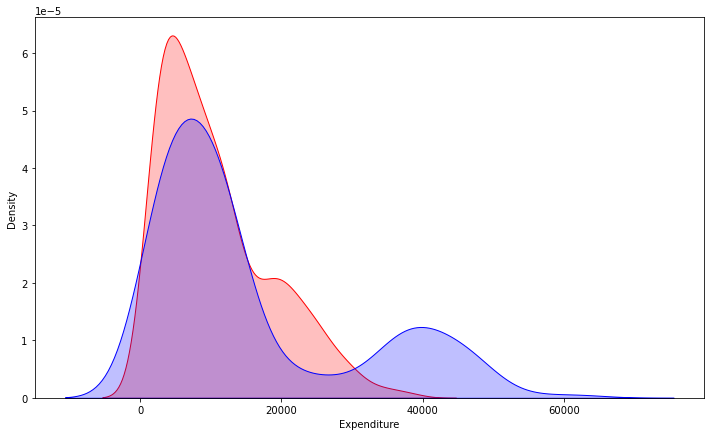

In [17]:
visuals.KDE_obese_vs_notobese()

_Fewer obese people fall into the lower spending range between (0 and 20,000 dollars) than non obese people. Furthermore, non obese annual medical expenditure appears to max out at around 40,000 dollars, where as obese annual medical expenditure starts to taper off to a maximum just over 60,000 dollars._ 

#### _Statistical Testing_ 

T-Test (2 Tailed) Statistical Testing will be conducted because we are using the medical expenditure of customers in the 'obese' category according to BMI (subgroup) _compared to_ the medical expenditure of customers not in the 'obese' category according to BMI (subgroup)

- H0: Mean charges of 'obese' customers == Mean charges of 'not obese' customers
- HA: Mean charges of 'obese' customers != Mean charges of 'not obese' customers

In [18]:
#define variable
train_not_obese = df[df['bmi'] < 30]
train_obese = df[df['bmi'] > 30.00001]

#create variables 
obese_customers_charges = train_not_obese.charges
non_obese_customers_charges = train_obese.charges


#Compare variance 
print(obese_customers_charges.var())
print(non_obese_customers_charges.var())

61521072.649990894
212082642.04941204


#### Variance not equal, set equal_var to false

In [19]:
#set alpha
alpha = 0.05 
#compute statistic and probability 
t, p = stats.ttest_ind(obese_customers_charges, non_obese_customers_charges, equal_var = False )
#print results 
print(t, p, alpha)
#evaluate outcome
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print("We fail to reject the null hypothesis")

-7.680295461155982 3.4844733376072226e-14 0.05
We reject the null hypothesis, our data is statistically relevant.


_The statistical test confirmed our previous observation: the data showed a significant enough variance to reject the null hypothesis._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Q. 4

### _Is the annual medical expenditure of smokers significantly higher than non smokers?_

<AxesSubplot:xlabel='smoker', ylabel='charges'>

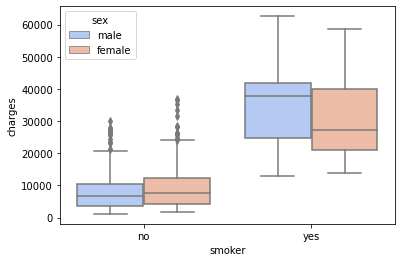

In [20]:
sns.boxplot(x='smoker', y='charges', data=train,hue='sex', palette='coolwarm')

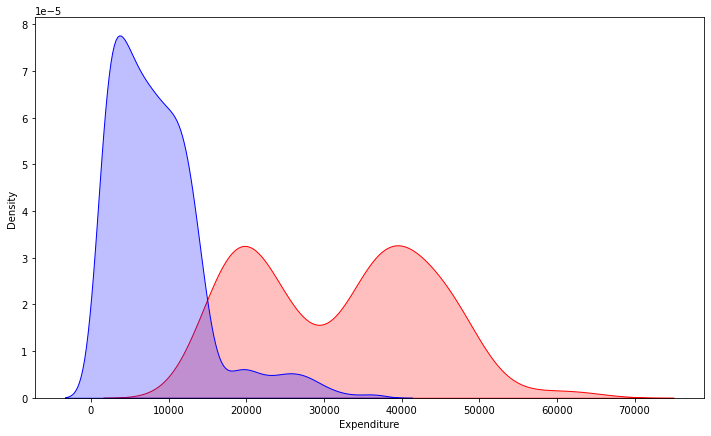

In [21]:
visuals.KDE_smokers_vs_nonsmokers()

_It appears smokers incur much higher annual medical expenditures than non smokers._

#### _Statistical Testing_ 

T-Test (2 Tailed) Statistical Testing will be conducted because we are using the medical expenditure of smokers (subgroup) _compared to_ the medical expenditure of non smokers (subgroup)

- H0: Mean charges of smokers == Mean charges of non smokers
- HA: Mean charges of smokers != Mean charges of non smokers

In [22]:
#define variable
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker']== 'no']

#create variables 
smokers_customers = smokers.charges
non_smokers_customers = non_smokers.charges

#Compare variance 
print(smokers_customers.var())
print(non_smokers_customers.var())

133207311.20634921
35925420.49611172


#### Variance not equal, set equal_var to false

In [23]:
#set alpha
alpha = 0.05 
#compute statistic and probability 
t, p = stats.ttest_ind(smokers_customers, non_smokers_customers, equal_var = False )
#print results 
print(t, p, alpha)
#evaluate outcome
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print("We fail to reject the null hypothesis")

32.751887766341824 5.88946444671698e-103 0.05
We reject the null hypothesis, our data is statistically relevant.


_The statistical test confirmed our previous observation: the data showed a significant enough variance to reject the null hypothesis._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Q. 5 

### _All things being equal, Is the annual medical expenditure equal from region to region?_ 

<AxesSubplot:xlabel='region', ylabel='charges'>

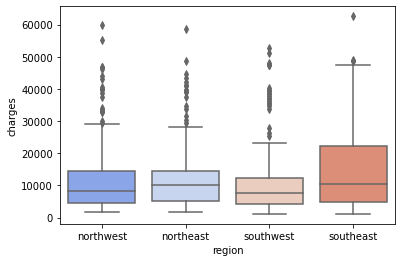

In [24]:
sns.boxplot(x='region', y='charges', data=train, palette='coolwarm')

_It appears the southeast has the largest spread of annual medical expenditures. The 50% percentile of all four regions is close, with the northeast possibly having a slightly higher 50% percentile than the other three regions._

#### Statistical Testing

_ANOVA Test_ 
   - HO: There is no significant difference between the charges (medical expenditure) of each region 
   - HA: There is a significant difference between the charges (medical expenditure) of each region 

In [25]:
alpha = 0.05 
F, p = stats.f_oneway(train[train.region == 'southeast'].charges,
                      train[train.region == 'southwest'].charges,
                      train[train.region == 'northeast'].charges, 
                      train[train.region == 'northwest'].charges)

print('Anova Test Results on Region')
print('F-value: ',F)
print('p-value: ',p)
if p > alpha:
    print("\nWe fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis")
else: 
    print("We reject the null hypothesis\n\n")

Anova Test Results on Region
F-value:  3.7116875154185625
p-value:  0.011405435904120432
We reject the null hypothesis




_The statistical test confirmed our previous observation: the data showed a significant enough variance to reject the null hypothesis._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Prepare Data for Modeling 

In [26]:
df = pd.read_csv('insurance.csv')

In [27]:
df = prepare.prepare_insurance_for_modeling(df)

In [28]:
train, validate, test = prepare.split_insurance_data(df)

In [29]:
#split data
X_train = train.drop(columns=['charges'])
y_train = train[['charges']]

X_validate = validate.drop(columns=['charges'])
y_validate = validate[['charges']]

X_test = test.drop(columns=['charges'])
y_test = test[['charges']]

In [30]:
#scale data 
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns.values).set_index([X_train.index.values])
X_validate = pd.DataFrame(scaler.transform(X_validate), columns= X_validate.columns.values).set_index([X_validate.index.values])
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns.values).set_index([X_test.index.values])

# Clustering

In this section, clusters are created to discern potential groupings with significantly different variances in charges. The number of clusters were determined using the elbow plot method. This method is used to identify when change in inertia to k has dropped relative to lower k values.

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between the charges of each cluster. 
 - HA: There is a significant difference between the charges of each cluster. 

### ANOVA TEST ON AGE AND SMOKER

In [33]:
#significance level 
a = 0.05 
#define x 
X = X_train[['age', 'smoker_encoded']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [34]:
train['cluster_rooms'] = kmeans.predict(X)

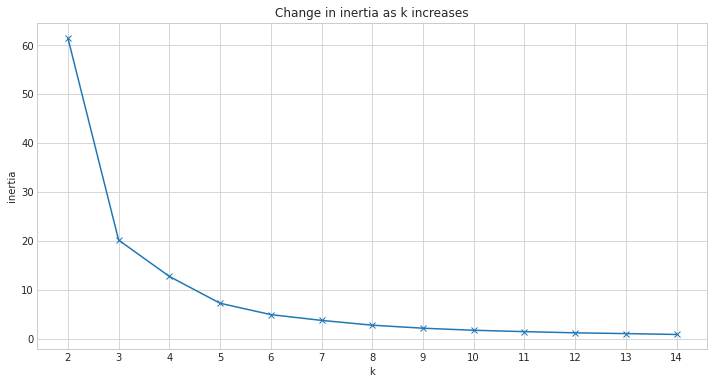

In [35]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

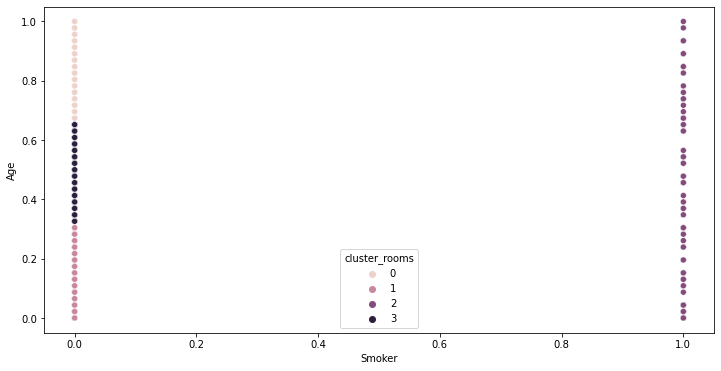

In [36]:
# plot rooms by log error
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_train.smoker_encoded, y=X_train.age, hue=train.cluster_rooms)
plt.xlabel("Smoker")
plt.ylabel("Age")
plt.show()


In [37]:
train.groupby('cluster_rooms')[ 'age', 'charges'].median()

age              charges
cluster_rooms                                          
0                            56.00            11,881.97
1                            24.00             3,189.03
2                            36.00            21,082.16
3                            40.00             7,149.89

In [38]:
alpha = 0.05

F, p = stats.f_oneway(train[train.cluster_rooms == 0].charges,
                      train[train.cluster_rooms == 1].charges,
                      train[train.cluster_rooms == 2].charges,
                      train[train.cluster_rooms == 3].charges)

print('Anova Test Results on Room/Age Cluster')
print('F-value: ',F)
print('p-value: ',p)
if p > alpha:
    print("\nWe fail to reject null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject null hypothesis.\n\n")

Anova Test Results on Room/Age Cluster
F-value:  300.6920428637332
p-value:  5.262945960247861e-123
We reject null hypothesis.




### ANOVA TEST ON AGE AND BMI

In [39]:
#significance level 
a = 0.05 
#define x 
X = X_train[['age', 'bmi']]
#define kmeans
kmeans = KMeans(n_clusters=5)
#fit 
kmeans.fit(X)

KMeans(n_clusters=5)

In [40]:
train['cluster_bmi'] = kmeans.predict(X)

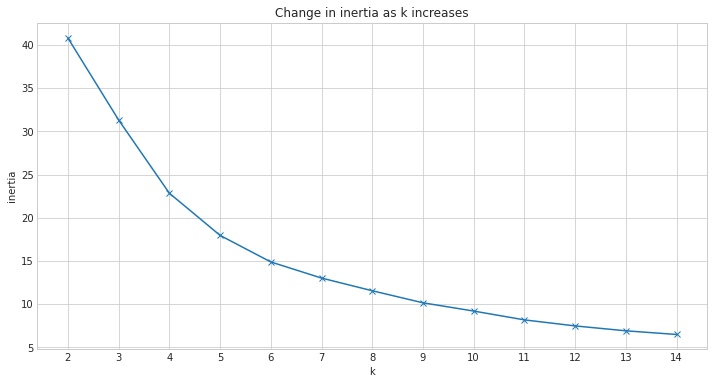

In [41]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

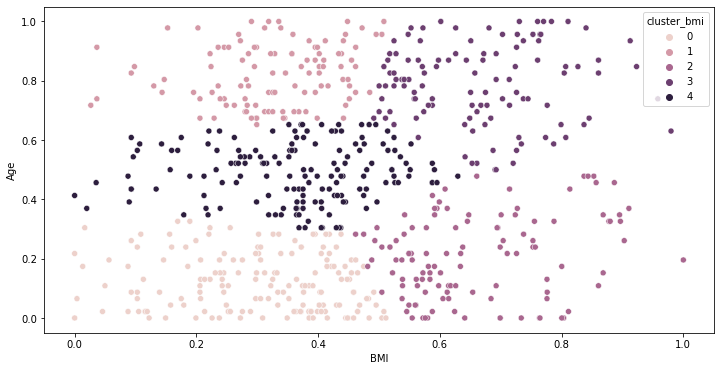

In [42]:
# plot rooms by log error
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_train.bmi, y=X_train.age, hue=train.cluster_bmi)
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

In [43]:
train.groupby('cluster_bmi')[ 'age', 'bmi', 'charges'].median()

age                  bmi              charges
cluster_bmi                                                               
0                          23.00                26.66             3,560.25
1                          56.00                26.65            12,481.50
2                          28.00                34.96             4,058.71
3                          55.00                36.20            11,411.68
4                          40.50                28.02             7,419.86

In [44]:
alpha = 0.05

F, p = stats.f_oneway(train[train.cluster_bmi == 0].charges,
                      train[train.cluster_bmi == 1].charges,
                      train[train.cluster_bmi == 2].charges,
                      train[train.cluster_bmi == 3].charges,
                      train[train.cluster_bmi == 4].charges)

print('Anova Test Results on BMI/Age Cluster')
print('F-value: ',F)
print('p-value: ',p)
if p > alpha:
    print("\nWe fail to reject null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject null hypothesis.\n\n")

Anova Test Results on BMI/Age Cluster
F-value:  44.28779361125986
p-value:  6.0254960455775855e-33
We reject null hypothesis.




### ANOVA TEST ON AGE, SMOKER, CHILDREN

In [45]:
#significance level 
a = 0.05 
#define x 
X = X_train[['age', 'smoker_encoded', 'children']]
Z = X_validate[['age', 'smoker_encoded', 'children']]
A = X_test[['age', 'smoker_encoded', 'children']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [46]:
train['cluster_children'] = kmeans.predict(X)
validate['cluster_model'] = kmeans.predict(Z)
test['cluster_model2'] = kmeans.predict(A)

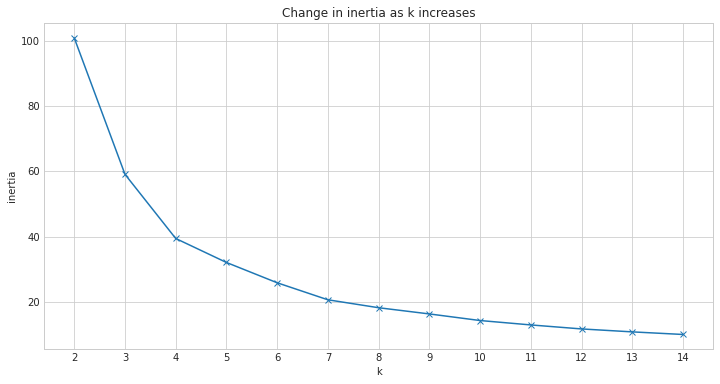

In [47]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

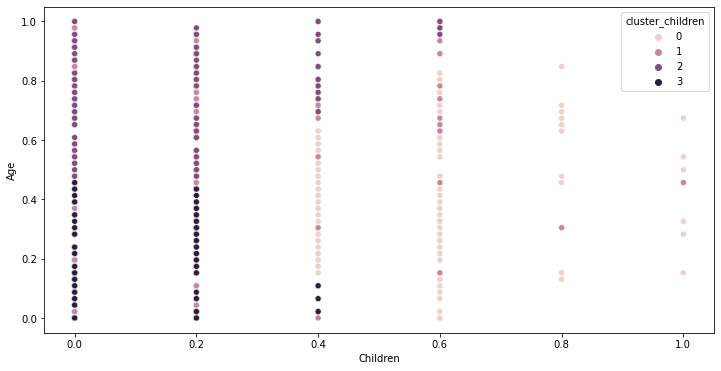

In [48]:
# plot rooms by log error
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_train.children, y=X_train.age, hue=train.cluster_children)
plt.xlabel("Children")
plt.ylabel("Age")
plt.show()

In [49]:
train.groupby('cluster_children')[ 'age', 'children', 'charges'].median()

age             children  \
cluster_children                                             
0                               38.00                 3.00   
1                               36.00                 1.00   
2                               54.00                 0.00   
3                               24.00                 0.00   

                              charges  
cluster_children                       
0                            7,185.11  
1                           21,082.16  
2                           10,979.37  
3                            2,974.13

In [50]:
train_cluster0 =train[train.cluster_children == 0]
train_cluster1 =train[train.cluster_children == 1]
train_cluster2 =train[train.cluster_children == 2]
train_cluster3 =train[train.cluster_children == 3]

In [56]:
validate_cluster0 =validate[validate.cluster_model == 0]
validate_cluster1 =validate[validate.cluster_model == 1]
validate_cluster2 =validate[validate.cluster_model == 2]
validate_cluster3 =validate[validate.cluster_model == 3]

In [57]:
test_cluster0 =test[test.cluster_model2 == 0]
test_cluster1 =test[test.cluster_model2 == 1]
test_cluster2 =test[test.cluster_model2 == 2]
test_cluster3 =test[test.cluster_model2 == 3]

In [58]:
alpha = 0.05

F, p = stats.f_oneway(train[train.cluster_children == 0].charges,
                      train[train.cluster_children == 1].charges,
                      train[train.cluster_children == 2].charges,
                      train[train.cluster_children == 3].charges)

print('Anova Test Results on BMI/Age Cluster')
print('F-value: ',F)
print('p-value: ',p)
if p > alpha:
    print("\nWe fail to reject null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject null hypothesis.\n\n")

Anova Test Results on BMI/Age Cluster
F-value:  239.9225343218794
p-value:  3.0551738235754887e-105
We reject null hypothesis.




<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# IV. Model 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Set Baseline 

In [59]:
#setting basline line to average charges 
baseline = train.charges.mean()

In [60]:
# calculating MSE with y_train (actual) and baseline
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

In [61]:
#baseline for train data 
train['b_charges'] = train.charges.mean()
RMSE_base = sqrt(mean_squared_error(train.charges, train.b_charges))
print(f'The Baseline train RMSE charges is :{RMSE_base}')

#baseline for validate data 
validate['b_charges'] = validate.charges.mean()
RMSE_base = sqrt(mean_squared_error(validate.charges, validate.b_charges))
print(f'The Baseline validate RMSE charges is :{RMSE_base}')

#baseline for test data 
test['b_charges'] = test.charges.mean()
RMSE_base = sqrt(mean_squared_error(test.charges, test.b_charges))
print(f'The Baseline test RMSE charges is :{RMSE_base}')

The Baseline train RMSE charges is :7122.740540543174
The Baseline validate RMSE charges is :7669.866403452669
The Baseline test RMSE charges is :7117.703183917795


In [62]:
#Predict charges_mean
charges_pred_mean = y_train.charges.mean()
y_train['charges_pred_mean'] = charges_pred_mean
y_validate['charges_pred_mean'] = charges_pred_mean

# Compute charges_chargespred_median
charges_pred_median = y_train.charges.median()
y_train['charges_pred_median'] = charges_pred_median
y_validate['charges_pred_median'] = charges_pred_median

# RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.charges, y_validate.charges_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.charges, y_validate.charges_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)


RMSE using Mean
Train/In-Sample:  7122.740540543174 
Validate/Out-of-Sample:  7687.928291581493
RMSE using Median
Train/In-Sample:  7304.954602642301 
Validate/Out-of-Sample:  7964.991028751297


# MODEL 1 LINEAR REGRESSION 

In [64]:
#make the thing
lm = LinearRegression(normalize=True)

# fit the model to our training data. 
lm.fit(X_train, y_train.charges)

# predict train
y_train['charges_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_lm) ** (1/2)

# predict validate
y_validate['charges_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_ols = mean_squared_error(y_validate.charges, y_validate.charges_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_ols)

RMSE for OLS using LinearRegression
Training/In-Sample:  4432.4363934105195 
Validation/Out-of-Sample:  4657.528663925983


In [65]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_ols}, ignore_index=True)
metric_df

model        RMSE_validate
0  mean_baseline             7,687.93
1  OLS Regressor             4,657.53

In [66]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train.charges)
y_hat = lm1.predict(X_train)

y_train['lm_1'] = y_hat

mean_squared_error(y_train.charges, y_hat)**(1/2)

4432.4363934105195

# MODEL 2 POLYNOMIAL REGRESSION 

In [67]:
# make the polynomial features to get a new set of features
pf1 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree2 = pf1.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf1.transform(X_validate)
X_test_degree =  pf1.transform(X_test)

# create the model object
lmP1 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lmP1.fit(X_train_degree2, y_train.charges)

# predict train
y_train['poly_1'] = lmP1.predict(X_train_degree2)

# evaluate: rmse
rmse_validate_lmP1 = mean_squared_error(y_train.charges, y_train.poly_1)**1/2

# predict validate
y_validate['poly_1'] = lmP1.predict(X_validate_degree)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.charges, y_validate.poly_1) ** (1/2)

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train)

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  4432.4363934105195


In [68]:
metric_df = metric_df.append({
    'model': 'Polynomial Regression', 
    'RMSE_validate': rmse_validate_lmP1}, ignore_index=True)
metric_df

model        RMSE_validate
0          mean_baseline             7,687.93
1          OLS Regressor             4,657.53
2  Polynomial Regression         8,373,346.97

# MODEL 3 LASSO & LARS 

In [11]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.charges, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

NameError: name 'X_train' is not defined

In [70]:
metric_df = metric_df.append({
    'model': 'LassoLars', 
    'RMSE_validate': rmse_validate_lars}, ignore_index=True)
metric_df

model        RMSE_validate
0          mean_baseline             7,687.93
1          OLS Regressor             4,657.53
2  Polynomial Regression         8,373,346.97
3              LassoLars             4,657.90

In [71]:
print("RMSE using Mean\nTrain/In-Sample: ", rmse_train)

RMSE using Mean
Train/In-Sample:  4432.44132532556


In [10]:
fig = px.histogram(y_train, 
                   x='charges', 
                   marginal='box', 
                   color_discrete_sequence=['dark blue'], 
                   title='Distribution of Charges for Total Data')
fig.update_layout(bargap=0.1)
fig.show()

NameError: name 'y_train' is not defined

# Cluster 0

In [73]:
#split data
X_train = train_cluster0.drop(columns=['charges'])
y_train = train_cluster0[['charges']]

X_validate = validate_cluster0.drop(columns=['charges'])
y_validate = validate_cluster0[['charges']]

X_test = test_cluster0.drop(columns=['charges'])
y_test = test_cluster0[['charges']]

### _Set Baseline Cluster 0_

In [74]:
#setting baseline line to average charges 
baseline = y_train.charges.mean()

In [75]:
# calculating MSE with y_train (actual) and baseline
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

In [76]:
#baseline for train data 
train_cluster0['baseline_charges'] = train_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(train_cluster0.charges, train_cluster0.baseline_charges))
print(f'The Baseline train RMSE charges is :{RMSE_base}')

#baseline for validate data 
validate_cluster0['baseline_charges'] = validate_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(validate_cluster0.charges, validate_cluster0.baseline_charges))
print(f'The Baseline validate RMSE charges is :{RMSE_base}')

#baseline for test data 
test_cluster0['baseline_charges'] = test_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(test_cluster0.charges, test_cluster0.baseline_charges))
print(f'The Baseline test RMSE charges is :{RMSE_base}')

The Baseline train RMSE charges is :5185.939548807599
The Baseline validate RMSE charges is :3411.9929409742153
The Baseline test RMSE charges is :4910.351462294179


In [77]:
#Predict charges_mean
charges_pred_mean = y_train.charges.mean()
y_train['charges_pred_mean'] = charges_pred_mean
y_validate['charges_pred_mean'] = charges_pred_mean

# Compute charges_chargespred_median
charges_pred_median = y_train.charges.median()
y_train['charges_pred_median'] = charges_pred_median
y_validate['charges_pred_median'] = charges_pred_median

# RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.charges, y_validate.charges_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.charges, y_validate.charges_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)


RMSE using Mean
Train/In-Sample:  5185.939548807599 
Validate/Out-of-Sample:  3423.133668603157
RMSE using Median
Train/In-Sample:  5369.562624538291 
Validate/Out-of-Sample:  3589.9471782668716


In [78]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate}])

In [79]:
X_train.drop(columns=['cluster_children'], inplace = True)
X_train.drop(columns=['cluster_rooms'], inplace = True)
X_train.drop(columns=['cluster_bmi'], inplace = True)
X_validate.drop(columns=['cluster_model'], inplace = True)
X_test.drop(columns=['cluster_model2'], inplace = True)

### _LASSO & LARS for Cluster 0_

In [80]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.charges, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  4517.583422725979 
Validation/Out-of-Sample:  2724.856273101915


In [81]:
metric_df = metric_df.append({
    'model': 'LassoLars', 
    'RMSE_validate': rmse_validate_lars}, ignore_index=True)
metric_df

model        RMSE_validate
0  mean_baseline             3,423.13
1      LassoLars             2,724.86

In [82]:
print("RMSE using Mean\nTrain/In-Sample: ", rmse_train)

RMSE using Mean
Train/In-Sample:  4517.583422725979


_While both OLS Regressor and LassoLars beat baseline, the LassoLars function did slightly better. I will use this model to obtain final RMSE metric using test data_

In [83]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict test
y_test['logerror_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_test.charges, y_test.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  4517.583422725979 
Validation/Out-of-Sample:  4570.7916881482015


In [84]:
fig = px.histogram(y_train, 
                   x='charges', 
                   marginal='box', 
                   color_discrete_sequence=['dark blue'], 
                   title='Distribution of Charges for Cluster 0')
fig.update_layout(bargap=0.1)
fig.show()

_The final RMSE for cluster 0 was 4,570. This beat the baseline test score: 4,910_

# Cluster 1 

In [85]:
#split data
X_train = train_cluster1.drop(columns=['charges'])
y_train = train_cluster1[['charges']]

X_validate = validate_cluster1.drop(columns=['charges'])
y_validate = validate_cluster1[['charges']]

X_test = test_cluster1.drop(columns=['charges'])
y_test = test_cluster1[['charges']]

In [86]:
X_train.drop(columns=['cluster_children'], inplace = True)
X_train.drop(columns=['cluster_rooms'], inplace = True)
X_train.drop(columns=['cluster_bmi'], inplace = True)
X_validate.drop(columns=['cluster_model'], inplace = True)
X_test.drop(columns=['cluster_model2'], inplace = True)

### Setting baseline for cluster 1

In [87]:
#setting baseline line to average charges 
baseline = y_train.charges.mean()

In [88]:
# calculating MSE with y_train (actual) and baseline
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

In [89]:
#baseline for train data 
train_cluster0['baseline_charges'] = train_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(train_cluster0.charges, train_cluster0.baseline_charges))
print(f'The Baseline train RMSE charges is :{RMSE_base}')

#baseline for validate data 
validate_cluster0['baseline_charges'] = validate_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(validate_cluster0.charges, validate_cluster0.baseline_charges))
print(f'The Baseline validate RMSE charges is :{RMSE_base}')

#baseline for test data 
test_cluster0['baseline_charges'] = test_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(test_cluster0.charges, test_cluster0.baseline_charges))
print(f'The Baseline test RMSE charges is :{RMSE_base}')

The Baseline train RMSE charges is :5185.939548807599
The Baseline validate RMSE charges is :3411.9929409742153
The Baseline test RMSE charges is :4910.351462294179


In [90]:
#Predict charges_mean
charges_pred_mean = y_train.charges.mean()
y_train['charges_pred_mean'] = charges_pred_mean
y_validate['charges_pred_mean'] = charges_pred_mean

# Compute charges_chargespred_median
charges_pred_median = y_train.charges.median()
y_train['charges_pred_median'] = charges_pred_median
y_validate['charges_pred_median'] = charges_pred_median

# RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.charges, y_validate.charges_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.charges, y_validate.charges_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)


RMSE using Mean
Train/In-Sample:  5156.021491209547 
Validate/Out-of-Sample:  5709.113607994354
RMSE using Median
Train/In-Sample:  5246.993365788506 
Validate/Out-of-Sample:  5880.552428712426


In [91]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate}])

### Lasso and Lars for Cluster 1 

In [92]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.charges, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  3937.9303218923205 
Validation/Out-of-Sample:  4382.779353232467


In [93]:
metric_df = metric_df.append({
    'model': 'LassoLars', 
    'RMSE_validate': rmse_validate_lars}, ignore_index=True)
metric_df

model        RMSE_validate
0  mean_baseline             5,709.11
1      LassoLars             4,382.78

In [94]:
print("RMSE using Mean\nTrain/In-Sample: ", rmse_train)

RMSE using Mean
Train/In-Sample:  3937.9303218923205


In [95]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict test
y_test['logerror_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_test.charges, y_test.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  3937.9303218923205 
Validation/Out-of-Sample:  4744.666782701942


In [96]:
fig = px.histogram(y_train, 
                   x='charges', 
                   marginal='box', 
                   color_discrete_sequence=['dark blue'], 
                   title='Distribution of Charges for Cluster 1')
fig.update_layout(bargap=0.1)
fig.show()

# Cluster 2

In [97]:
#split data
X_train = train_cluster2.drop(columns=['charges'])
y_train = train_cluster2[['charges']]

X_validate = validate_cluster2.drop(columns=['charges'])
y_validate = validate_cluster2[['charges']]

X_test = test_cluster2.drop(columns=['charges'])
y_test = test_cluster2[['charges']]

In [98]:
X_train.drop(columns=['cluster_children'], inplace = True)
X_train.drop(columns=['cluster_rooms'], inplace = True)
X_train.drop(columns=['cluster_bmi'], inplace = True)
X_validate.drop(columns=['cluster_model'], inplace = True)
X_test.drop(columns=['cluster_model2'], inplace = True)

### Setting baseline for cluster 2

In [99]:
#setting baseline line to average charges 
baseline = y_train.charges.mean()

In [100]:
# calculating MSE with y_train (actual) and baseline
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

In [101]:
#baseline for train data 
train_cluster0['baseline_charges'] = train_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(train_cluster0.charges, train_cluster0.baseline_charges))
print(f'The Baseline train RMSE charges is :{RMSE_base}')

#baseline for validate data 
validate_cluster0['baseline_charges'] = validate_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(validate_cluster0.charges, validate_cluster0.baseline_charges))
print(f'The Baseline validate RMSE charges is :{RMSE_base}')

#baseline for test data 
test_cluster0['baseline_charges'] = test_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(test_cluster0.charges, test_cluster0.baseline_charges))
print(f'The Baseline test RMSE charges is :{RMSE_base}')

The Baseline train RMSE charges is :5185.939548807599
The Baseline validate RMSE charges is :3411.9929409742153
The Baseline test RMSE charges is :4910.351462294179


In [102]:
#Predict charges_mean
charges_pred_mean = y_train.charges.mean()
y_train['charges_pred_mean'] = charges_pred_mean
y_validate['charges_pred_mean'] = charges_pred_mean

# Compute charges_chargespred_median
charges_pred_median = y_train.charges.median()
y_train['charges_pred_median'] = charges_pred_median
y_validate['charges_pred_median'] = charges_pred_median

# RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.charges, y_validate.charges_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.charges, y_validate.charges_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)

RMSE using Mean
Train/In-Sample:  4638.2112022365145 
Validate/Out-of-Sample:  5942.1482176101
RMSE using Median
Train/In-Sample:  4670.05505971269 
Validate/Out-of-Sample:  6046.825040686386


In [103]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate}])

### Lasso and Lars for Cluster 2

In [104]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.charges, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  3833.016484465834 
Validation/Out-of-Sample:  5307.785503486757


In [105]:
metric_df = metric_df.append({
    'model': 'LassoLars', 
    'RMSE_validate': rmse_validate_lars}, ignore_index=True)
metric_df

model        RMSE_validate
0  mean_baseline             5,942.15
1      LassoLars             5,307.79

In [106]:
print("RMSE using Mean\nTrain/In-Sample: ", rmse_train)

RMSE using Mean
Train/In-Sample:  3833.016484465834


In [107]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict test
y_test['logerror_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_test.charges, y_test.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  3833.016484465834 
Validation/Out-of-Sample:  4626.985829885362


In [108]:
fig = px.histogram(y_train, 
                   x='charges', 
                   marginal='box', 
                   color_discrete_sequence=['dark blue'], 
                   title='Distribution of Charges for Cluster 2')
fig.update_layout(bargap=0.1)
fig.show()

# Cluster 3

In [109]:
#split data
X_train = train_cluster3.drop(columns=['charges'])
y_train = train_cluster3[['charges']]

X_validate = validate_cluster3.drop(columns=['charges'])
y_validate = validate_cluster3[['charges']]

X_test = test_cluster3.drop(columns=['charges'])
y_test = test_cluster3[['charges']]

In [110]:
X_train.drop(columns=['cluster_children'], inplace = True)
X_train.drop(columns=['cluster_rooms'], inplace = True)
X_train.drop(columns=['cluster_bmi'], inplace = True)
X_validate.drop(columns=['cluster_model'], inplace = True)
X_test.drop(columns=['cluster_model2'], inplace = True)

### Setting Baseline for Cluster 3 

In [111]:
#setting baseline line to average charges 
baseline = y_train.charges.mean()

In [112]:
# calculating MSE with y_train (actual) and baseline
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

In [113]:
#baseline for train data 
train_cluster0['baseline_charges'] = train_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(train_cluster0.charges, train_cluster0.baseline_charges))
print(f'The Baseline train RMSE charges is :{RMSE_base}')

#baseline for validate data 
validate_cluster0['baseline_charges'] = validate_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(validate_cluster0.charges, validate_cluster0.baseline_charges))
print(f'The Baseline validate RMSE charges is :{RMSE_base}')

#baseline for test data 
test_cluster0['baseline_charges'] = test_cluster0.charges.mean()
RMSE_base = sqrt(mean_squared_error(test_cluster0.charges, test_cluster0.baseline_charges))
print(f'The Baseline test RMSE charges is :{RMSE_base}')

The Baseline train RMSE charges is :5185.939548807599
The Baseline validate RMSE charges is :3411.9929409742153
The Baseline test RMSE charges is :4910.351462294179


In [114]:
#Predict charges_mean
charges_pred_mean = y_train.charges.mean()
y_train['charges_pred_mean'] = charges_pred_mean
y_validate['charges_pred_mean'] = charges_pred_mean

# Compute charges_chargespred_median
charges_pred_median = y_train.charges.median()
y_train['charges_pred_median'] = charges_pred_median
y_validate['charges_pred_median'] = charges_pred_median

# RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.charges, y_validate.charges_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.charges, y_train.charges_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.charges, y_validate.charges_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)

RMSE using Mean
Train/In-Sample:  4928.970281399733 
Validate/Out-of-Sample:  4328.011955414462
RMSE using Median
Train/In-Sample:  5201.957642865707 
Validate/Out-of-Sample:  4456.276480253032


In [115]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate}])

### Lasso + Lars for Cluster 3

In [116]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.charges, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  4554.162389611846 
Validation/Out-of-Sample:  4483.653577883366


In [117]:
metric_df = metric_df.append({
    'model': 'LassoLars', 
    'RMSE_validate': rmse_validate_lars}, ignore_index=True)
metric_df

model        RMSE_validate
0  mean_baseline             4,328.01
1      LassoLars             4,483.65

In [118]:
print("RMSE using Mean\nTrain/In-Sample: ", rmse_train)

RMSE using Mean
Train/In-Sample:  4554.162389611846


In [119]:
# create the model object
lars = LassoLars(alpha=.1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.charges)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.charges, y_train.logerror_pred_lars) ** (1/2)

# predict test
y_test['logerror_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_test.charges, y_test.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  4554.162389611846 
Validation/Out-of-Sample:  4878.384151220454


In [120]:
fig = px.histogram(y_train, 
                   x='charges', 
                   marginal='box', 
                   color_discrete_sequence=['dark blue'], 
                   title='Distribution of Charges for Cluster 3')
fig.update_layout(bargap=0.1)
fig.show()

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# V. Conclusion 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Key Takeaways

While the models did not perform as well as I had hoped, there is still valuable insight to be gained from this report. First, the reason the models performed poorly is due to the inclusion of outliers. Although it is common knowledge outliers negatively impact any regression model, for the purpose of business analysis, it was critical to include them.

### Recommendations 

The question moving forward should be, 'how should we handle the outliers?' From my perspective, I see two clear options. Option 1, offer 'cluster rate' health insurance premiums that have a maximum payout of the largest non-outlier maximum value. Keeping in mind this number will not be adequate for some customers, offer a different package (at a higher rate) for those that 'elect' to choose a different type of coverage. The second option is to do further research on the outliers to determine what _legal qualifying factor_ could place them in a separate category. Because preexisting conditions are protected by law, the research team needs to focus on any characteristic that the outlier group has in common that is not covered by law. (i.e. smokers vs non-smokers). 

### Next Steps 

_This report should not be seen as the final word but rather the first step in making more informed decisions moving forward. I believe strongly, whether the board chooses to offer cluster rate insurance premiums as they are or proceed in further research, there will be many opportunities for data analysis in the future. I am confident small changes can make big differences in health insurance affordability as well as company profitability.'_